***Assignment - 3 : Developing 3 layer Neural network***

**Data generation**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Function to plot 4D graph to represent the 3 Dimensional MLP

In [69]:
def plot_4d(x, y, y_pred=None):
  plt.style.use("fivethirtyeight")
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(projection='3d')
  ax.scatter(x[:, 0], x[:, 1], x[:, 2],s=(y*50),c='cornflowerblue',label='underlying function',alpha=0.6)
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], x[:, 2],s=(y_pred * 50),c='black', label='predicted',alpha=0.6)
  plt.legend()
  plt.xlabel('Dimension 1', fontsize=12)
  plt.ylabel('Dimension 2', fontsize=12)
  plt.ylabel('Dimension 3', fontsize=12)

  plt.show()

## Generate synthetic data

x: (1000, 3), weights: (3, 1), bias: (1,), y: (1000, 1)


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


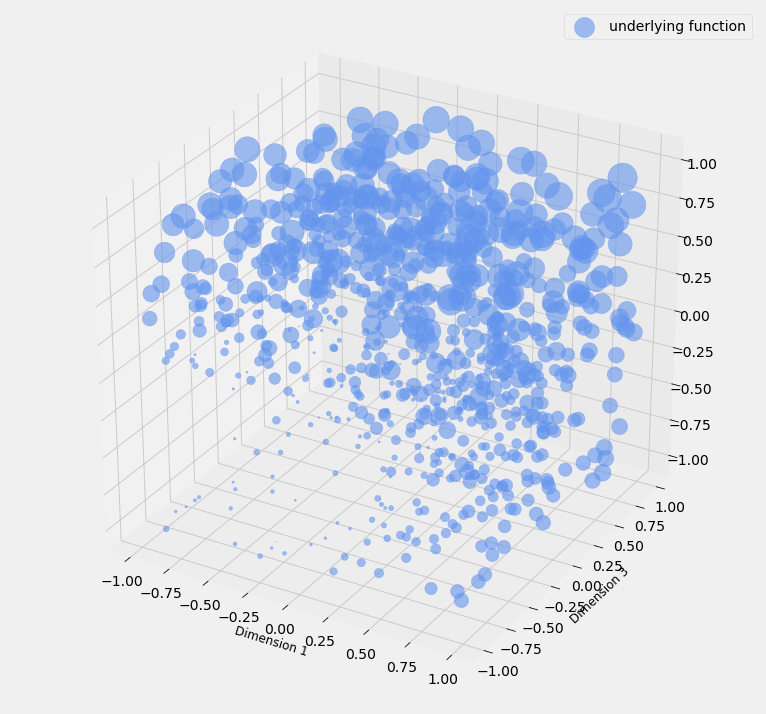

In [9]:
n = 1000
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[2, 1, 6],]).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_4d(x, y_true)

**3 Layer deep neural network for non linear regression using numpy**  

In [10]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = ((2 * self.x) + 1).T  @ gradient   ## check this
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [11]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

Epoch 0, loss 35.0062657852289
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 1, loss 22.826541409265413
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 2, loss 15.959827048296443
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 3, loss 12.047574898863623
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 4, loss 9.757998559340358
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 5, loss 8.351370859116448
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 6, loss 7.42456246972013
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 7, loss 6.762559374465111
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 8, loss 6.253297241996106
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 9, loss 5.8395993472215295
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 10, loss 5.492597735919736
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 11, loss 5.197411868714658
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 12, loss 4.945693488682216
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 13, loss 4.731

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


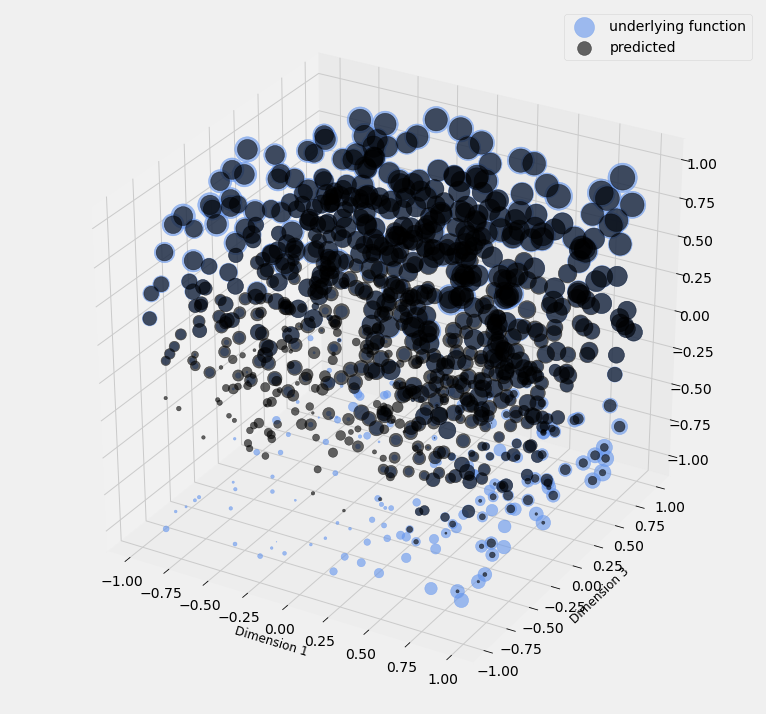

In [12]:
loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_4d(x, y_true, linear(x))

Adding non-linearities in our model.

---



In [13]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


In [14]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

MSE backward (1000, 1) (1000, 1) (1000, 1)
24.968027808227227


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


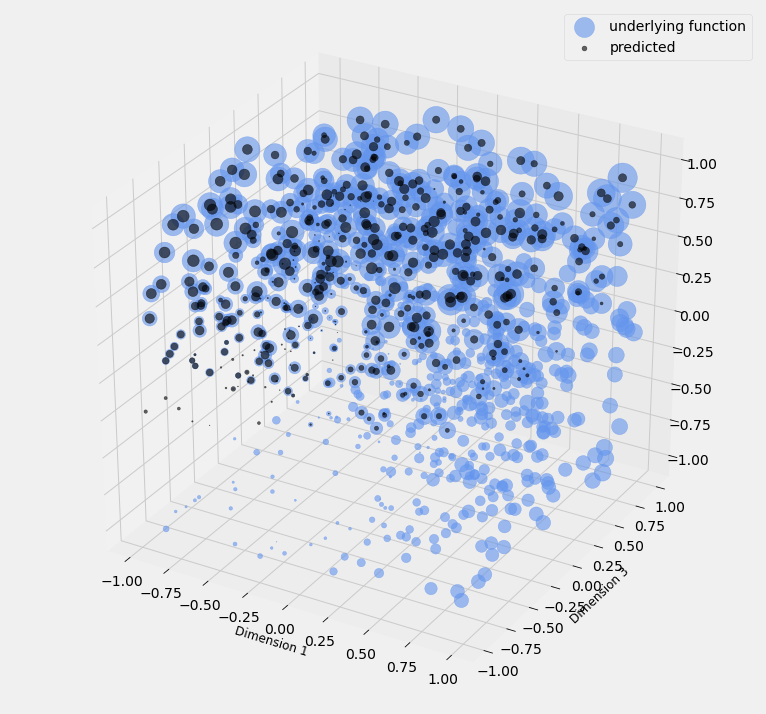

In [15]:
loss = MSE()
model = Model(d, 4)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_4d(x, y_true, y_pred)

In [16]:
loss = MSE()
model = Model(d, 4)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)

y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

28.848103374705577
MSE backward (1000, 1) (1000, 1) (1000, 1)
12.809809618660921


The above statistic shows decreasing mean square error value after one backward propagation. We will now run the 30 number of epochs to see loss_value.

Epoch 0, loss 12.809809618660921
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 1, loss 10.167657080005915
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 2, loss 24.777390608019406
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 3, loss 13.187808324161043
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 4, loss 3.2781550020329595
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 5, loss 6.148281919243141
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 6, loss 9.228362427695311
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 7, loss 23.482300734005843
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 8, loss 16.7567772453571
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 9, loss 5.927536370427996
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 10, loss 2.5036307726044655
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 11, loss 5.1786158609056665
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 12, loss 5.400013580093017
MSE backward (1000, 1) (1000, 1) (1000, 1)
Epoch 13, loss 

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


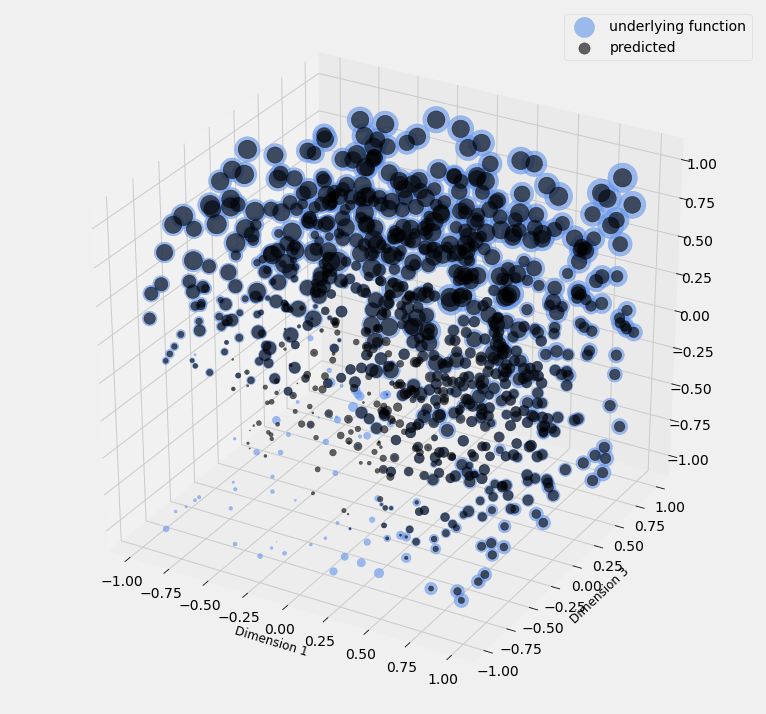

In [17]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=30)
plot_4d(x, y_true, model(x))

**3 layer deep neural network for non linear regression using pytorch from scratch.**

In [18]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(30.8205, grad_fn=<MseLossBackward0>)


Test just one forward and backward step

In [19]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(30.8205, grad_fn=<MseLossBackward0>)
tensor(22.6499, grad_fn=<MseLossBackward0>)


Run the training loop

In [21]:
def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=30)


tensor(0.4963, grad_fn=<MseLossBackward0>)
tensor(0.4844, grad_fn=<MseLossBackward0>)
tensor(0.4732, grad_fn=<MseLossBackward0>)
tensor(0.4626, grad_fn=<MseLossBackward0>)
tensor(0.4525, grad_fn=<MseLossBackward0>)
tensor(0.4430, grad_fn=<MseLossBackward0>)
tensor(0.4338, grad_fn=<MseLossBackward0>)
tensor(0.4251, grad_fn=<MseLossBackward0>)
tensor(0.4169, grad_fn=<MseLossBackward0>)
tensor(0.4088, grad_fn=<MseLossBackward0>)
tensor(0.4011, grad_fn=<MseLossBackward0>)
tensor(0.3937, grad_fn=<MseLossBackward0>)
tensor(0.3861, grad_fn=<MseLossBackward0>)
tensor(0.3790, grad_fn=<MseLossBackward0>)
tensor(0.3723, grad_fn=<MseLossBackward0>)
tensor(0.3659, grad_fn=<MseLossBackward0>)
tensor(0.3598, grad_fn=<MseLossBackward0>)
tensor(0.3539, grad_fn=<MseLossBackward0>)
tensor(0.3483, grad_fn=<MseLossBackward0>)
tensor(0.3427, grad_fn=<MseLossBackward0>)
tensor(0.3371, grad_fn=<MseLossBackward0>)
tensor(0.3319, grad_fn=<MseLossBackward0>)
tensor(0.3268, grad_fn=<MseLossBackward0>)
tensor(0.32

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


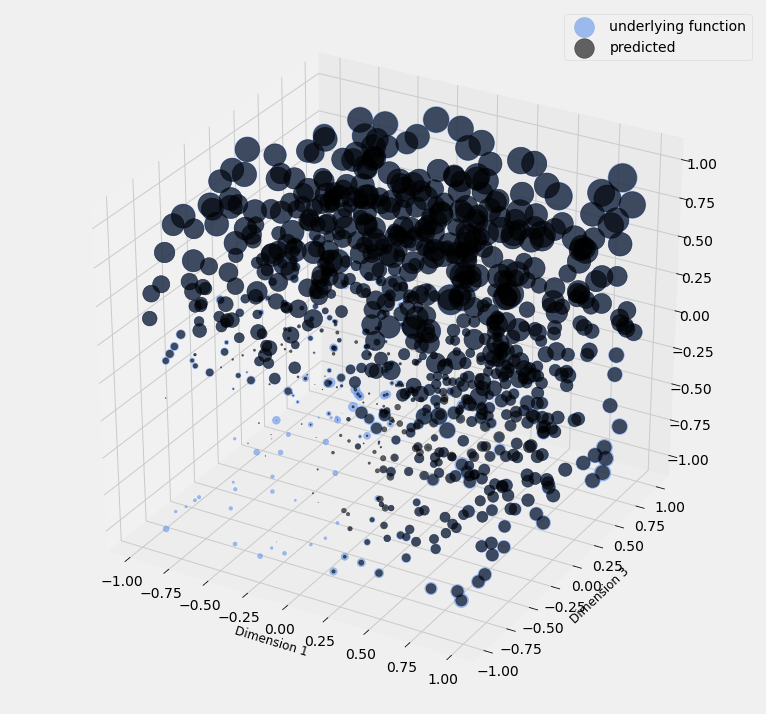

In [22]:
plot_4d(x, y_true, model(x_tensor).detach())

**3 layer deep neural network for non linear regression using pytorch.**

In [23]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [24]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [25]:
model = nn.Sequential(nn.Linear(3, 10),
                      nn.ReLU(),
                      nn.Linear(10, 1),
                      nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=3, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
  (3): Softmax(dim=1)
)


In [26]:
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()

logits = model(x_tensor)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)

loss_value = loss(y_pred, y_true_tensor)
print(loss_value)

tensor(31.2482)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1])) that is different to the input size (torch.Size([1000])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


**3 layer deep neural network for non linear regression using pytorch lightening.**

In [27]:
!pip install pytorch_lightning

     |████████████████████████████████| 527 kB 5.7 MB/s 
     |████████████████████████████████| 829 kB 27.8 MB/s 
     |████████████████████████████████| 596 kB 26.2 MB/s 
     |████████████████████████████████| 952 kB 33.6 MB/s 
     |████████████████████████████████| 134 kB 40.4 MB/s 
     |████████████████████████████████| 397 kB 44.0 MB/s 
     |████████████████████████████████| 1.1 MB 37.2 MB/s 
     |████████████████████████████████| 144 kB 44.7 MB/s 
     |████████████████████████████████| 271 kB 46.0 MB/s 
     |████████████████████████████████| 94 kB 3.4 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=1920e6019cb2c7e45588b9421cb971228fb8ac07bcba25c229db92f1b6d44ec8
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successful

Install PyTorch Lightning

In [ ]:
%%capture
! pip install git+https://github.com/PytorchLightning/pytorch-lightning.git@master --upgrade

In [29]:
from argparse import ArgumentParser
from typing import Any, Dict, List, Tuple, Type

import torch
from pytorch_lightning import LightningModule, Trainer, seed_everything
from torch import Tensor, nn
from torch.nn import functional as F
from torch.optim import Adam
from torch.optim.optimizer import Optimizer
from torch.utils.data import Dataset, TensorDataset


class LinearRegression(LightningModule):
    def __init__(
        self,
        input_dim: int,
        output_dim: int = 1,
        bias: bool = True,
        learning_rate: float = 1e-4,
        optimizer: Type[Optimizer] = Adam,
        l1_strength: float = 0.0,
        l2_strength: float = 0.0,
        **kwargs: Any,
    ) -> None:
        super().__init__()
        self.save_hyperparameters()
        self.optimizer = optimizer

        self.linear1= nn.Linear(3, 10)
        self.act1 = nn.ReLU()
        self.linear2= nn.Linear(10, 1)

    def forward(self, x: Tensor) -> Tensor:
        
        x = self.linear1(x)
        x  = self.act1(x)
        y_hat = self.linear2(x)
       # print(y_hat.shape)
        return y_hat

    def training_step(self, batch: Tuple[Tensor, Tensor], batch_idx: int) -> Dict[str, Tensor]:
        x, y = batch

        # flatten any input
        x = x.view(x.size(0), -1)
        y_hat = self(x)
        y_hat = y_hat.unsqueeze(1)
        loss = F.mse_loss(y_hat, y, reduction="sum")

        # L1 regularizer
        if self.hparams.l1_strength > 0:
            l1_reg = self.linear2.weight.abs().sum()
            loss += self.hparams.l1_strength * l1_reg

        # L2 regularizer
        if self.hparams.l2_strength > 0:
            l2_reg = self.linear2.weight.pow(2).sum()
            loss += self.hparams.l2_strength * l2_reg

        loss /= x.size(0)
        tensorboard_logs = {'train_loss': loss}
        return {'loss': loss, 'log': tensorboard_logs}

    def validation_step(self, batch: Tuple[Tensor, Tensor], batch_idx: int) -> Dict[str, Tensor]:
        x, y = batch
        x = x.view(x.size(0), -1)
        y_hat = self(x)
        y_hat = y_hat.unsqueeze(1)
        #print("y",y.shape)
        #print("y_hat",y_hat.shape)
        loss = F.mse_loss(y_hat, y, reduction="sum")
        return {'val_loss': loss}

    def validation_epoch_end(self, outputs: List[Dict[str, Tensor]]) -> Dict[str, Tensor]:
        avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        return {'val_loss': avg_loss}

    def test_step(self, batch: Tuple[Tensor, Tensor], batch_idx: int) -> Dict[str, Tensor]:
        x, y = batch
        y_hat = self(x)
        y_hat = y_hat.unsqueeze(1)
        return {'test_loss': F.mse_loss(y_hat, y, reduction="sum")}

    def test_epoch_end(self, outputs: List[Dict[str, Tensor]]) -> Dict[str, Tensor]:
        test_loss = torch.stack([x["test_loss"] for x in outputs]).mean()
        return {'test_mse_loss': test_loss}

    def configure_optimizers(self) -> Optimizer:
        return self.optimizer(self.parameters(), lr=0.0001)

  


In [30]:
x_tensor = torch.Tensor(x[:, np.newaxis])
y_tensor = torch.Tensor(y_true[:, np.newaxis])

dataset = TensorDataset(x_tensor, y_tensor)
ds_size = print(len(dataset))

train_set_size = int(len(dataset) * 0.7)

val_set_size =  int(len(dataset) * 0.15)

test_set_size =  int(len(dataset) * 0.15)


train_set, valid_set , test_set = torch.utils.data.random_split(dataset, [train_set_size, val_set_size,test_set_size])

# Rest of the code goes the same

train_dataset_loader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=False)



valid_dataset_loader = torch.utils.data.DataLoader(valid_set, batch_size=16, shuffle=False)
test_dataset_loader = torch.utils.data.DataLoader(test_set, batch_size=16, shuffle=False)



1000


In [31]:
# model
model = LinearRegression(input_dim=3, l1_strength=1, l2_strength=1)

# train
trainer = Trainer( max_epochs=30,log_every_n_steps=10)
trainer.fit(model, train_dataset_loader, valid_dataset_loader)

GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1585: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  "GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`."

  | Name    | Type   | Params
-----------------------------------
0 | linear1 | Linear | 40    
1 | act1    | ReLU   | 0     
2 | linear2 | Linear | 11    
-----------------------------------
51        Trainable params
0         Non-trainable params
51        Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/loops/optimization/closure.py:36: LightningDeprecationWarning: One of the returned values {'log'} has a `grad_fn`. We will detach it automatically but this behaviour will change in v1.6. Please detach it manually: `return {'loss': ..., 'something': something.detach()}`
  f"One of the returned values {set(extra.keys())} has a `grad_fn`. We will detach it automatically"


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

**Tensorflow various variants low level, api, functional, model, builtin.**

**3 layer NN using tensorflow from scratch**

In [33]:
import tensorflow as tf
from tensorflow import keras

In [36]:
n = 1000
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[2, 1, 6],]).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

x: (1000, 3), weights: (3, 1), bias: (1,), y: (1000, 1)


In [37]:
#A simple layer looks like this

class Linear(keras.layers.Layer):


  def __init__(self, units=10, input_dim=3):
      super(Linear, self).__init__()
      w_init = tf.random_normal_initializer()
      self.w = tf.Variable(
          initial_value=w_init(shape=(input_dim, units), dtype='float32'),
          trainable=True)
      b_init = tf.zeros_initializer()
      self.b = tf.Variable(
          initial_value=b_init(shape=(units,), dtype='float32'),
          trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b

In [38]:
# Instantiate our layer.
linear_layer = Linear(units=10, input_dim=3)

# The layer can be treated as a function.
# Here we call it on some data.
y = linear_layer(x)
y.shape

TensorShape([1000, 10])

In [39]:
class Linear(keras.layers.Layer):
  """y = w.x + b"""

  def __init__(self, units=32):
      super(Linear, self).__init__()
      self.units = units

  def build(self, input_shape):
      self.w = self.add_weight(shape=(input_shape[-1], self.units),
                               initializer='random_normal',
                               trainable=True)
      self.b = self.add_weight(shape=(self.units,),
                               initializer='random_normal',
                               trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b


# Instantiate our lazy layer.
linear_layer = Linear(10)

# This will also call `build(input_shape)` and create the weights.
y = linear_layer(x)

In [40]:
dataset = tf.data.Dataset.from_tensor_slices(
    (x, y_true))
dataset = dataset.shuffle(buffer_size=100).batch(64)

In [41]:
# Instantiate our linear layer (defined above) with 10 units.
linear_layer = Linear(20)

# Instantiate a logistic loss function that expects integer targets.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

# Iterate over the batches of the dataset.
for step, (x, y) in enumerate(dataset):
  
  # Open a GradientTape.
  with tf.GradientTape() as tape:

    # Forward pass.
    logits = linear_layer(x)

    # Loss value for this batch.
    loss = loss_fn(y, logits)
     
  # Get gradients of weights wrt the loss.
  gradients = tape.gradient(loss, linear_layer.trainable_weights)
  
  # Update the weights of our linear layer.
  optimizer.apply_gradients(zip(gradients, linear_layer.trainable_weights))
  
  # Logging.
  if step % 100 == 0:
    print('Step:', step, 'Loss:', float(loss))

Step: 0 Loss: nan


**3 Layer NN using tensorflow builtin functions**

In [42]:
from tensorflow.keras.layers import Layer

In [43]:
class Dropout(keras.layers.Layer):
  
  def __init__(self, rate):
    super(Dropout, self).__init__()
    self.rate = rate

  def call(self, inputs, training=None):
    if training:
      return tf.nn.dropout(inputs, rate=self.rate)
    return inputs
  

class MLPWithDropout(keras.layers.Layer):

  def __init__(self):
      super(MLPWithDropout, self).__init__()
      self.linear_1 = Linear(32)
      self.dropout = Dropout(0.5)
      self.linear_3 = Linear(10)

  def call(self, inputs, training=None):
      x = self.linear_1(inputs)
      x = tf.nn.relu(x)
      x = self.dropout(x, training=training)
      return self.linear_3(x)
    
mlp = MLPWithDropout()
y_train = mlp(tf.ones((2, 2)), training=True)
y_test = mlp(tf.ones((2, 2)), training=False)

In [56]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = Sequential([Linear(20), Dropout(0.5), Linear(1)])

y_ten = model(tf.ones((2, 16)))


# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(20, activation=tf.nn.relu),
  layers.Dense(20)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

In [57]:
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

In [58]:
model.fit(dataset, epochs=3)

Epoch 1/3
16/16 [==============================] - 2s 8ms/step - loss: nan - sparse_categorical_accuracy: 0.0000e+00
Epoch 2/3
16/16 [==============================] - 0s 6ms/step - loss: nan - sparse_categorical_accuracy: 0.0000e+00
Epoch 3/3
16/16 [==============================] - 0s 7ms/step - loss: nan - sparse_categorical_accuracy: 0.0000e+00


In [59]:
# Instantiate a metric object
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()


# Prepare our layer, loss, and optimizer.
model = keras.Sequential([keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(20),])
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

for epoch in range(2):
    # Iterate over the batches of a dataset.
    for step, (x, y) in enumerate(dataset):
        with tf.GradientTape() as tape:
            logits = model(x)
            # Compute the loss value for this batch.
            loss_value = loss_fn(y, logits)

        # Update the state of the `accuracy` metric.
        accuracy.update_state(y, logits)

        # Update the weights of the model to minimize the loss value.
        gradients = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))

        # Logging the current accuracy value so far.
        if step % 100 == 0:
            print('Epoch:', epoch, 'Step:', step)        
            print('Total running accuracy so far: %.3f' % accuracy.result())

    # Result the metric's state at the end of an epoch
    accuracy.reset_states()

Epoch: 0 Step: 0
Total running accuracy so far: 0.000
Epoch: 1 Step: 0
Total running accuracy so far: 0.000


In [60]:
# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(20, activation=tf.nn.relu),
  layers.Dense(20)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[accuracy])

# Instantiate some callbacks
callbacks = [tf.keras.callbacks.EarlyStopping(),
             tf.keras.callbacks.ModelCheckpoint(filepath='my_model.keras',
                                                save_best_only=True)]

model.fit(x, y,
          epochs=3,
          batch_size=64,
          callbacks=callbacks)

Epoch 1/3
1/1 [==============================] - 0s 402ms/step - loss: 3.0052 - sparse_categorical_accuracy: 0.0000e+00
Epoch 2/3
1/1 [==============================] - 0s 18ms/step - loss: 3.0000 - sparse_categorical_accuracy: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 16ms/step - loss: 2.9948 - sparse_categorical_accuracy: 0.0000e+00


In [62]:
# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(20)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

# Iterate over the batches of the dataset.
for step, (x, y) in enumerate(dataset):
  # Open a GradientTape.
  with tf.GradientTape() as tape:

    # Forward pass.
    logits = model(x)

    # Loss value for this batch.
    loss_value = 0
    loss_value = loss(y, logits)
     
  # Get gradients of loss wrt the weights.
  gradients = tape.gradient(loss_value, model.trainable_weights)
  
  # Update the weights of our linear layer.
  optimizer.apply_gradients(zip(gradients, model.trainable_weights))

  # Update the running accuracy.
  accuracy.update_state(y, logits)
  
  # Logging.
  if step % 100 == 0:
    print('Step:', step)
    print('Loss from last step: %.3f' % loss_value)
    print('Total running accuracy so far: %.3f' % accuracy.result())

Step: 0
Loss from last step: nan
Total running accuracy so far: 0.000


**3 layer NN using high level api**

In [63]:
# Let's reuse the Linear class
# with a `build` method that we defined above.

class MLP(keras.layers.Layer):
    """Simple stack of Linear layers."""

    def __init__(self):
        super(MLP, self).__init__()
        self.linear_1 = Linear(32)
        self.linear_2 = Linear(32)
        self.linear_3 = Linear(10)

    def call(self, inputs):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.linear_2(x)
        x = tf.nn.relu(x)
        return self.linear_3(x)

mlp = MLP()

# The first call to the `mlp` object will create the weights.
y = mlp(tf.ones(shape=(3, 64)))


# Weights are recursively tracked.
assert len(mlp.weights) == 6

In [64]:
class ActivityRegularization(keras.layers.Layer):
  """Layer that creates an activity sparsity regularization loss."""
  
  def __init__(self, rate=1e-2):
    super(ActivityRegularization, self).__init__()
    self.rate = rate
  
  def call(self, inputs):
    # We use `add_loss` to create a regularization loss
    # that depends on the inputs.
    self.add_loss(self.rate * tf.reduce_sum(inputs))
    return inputs

In [66]:
class SparseMLP(keras.layers.Layer):
  """Stack of Linear layers with a sparsity regularization loss."""

  def __init__(self):
      super(SparseMLP, self).__init__()
      self.linear_1 = Linear(20)
      self.regularization = ActivityRegularization(1e-2)
      self.linear_3 = Linear(20)

  def call(self, inputs):
      x = self.linear_1(inputs)
      x = tf.nn.relu(x)
      x = self.regularization(x)
      return self.linear_3(x)
    

mlp = SparseMLP()
y_pred = mlp(x)

print(mlp.losses)  # List containing one float32 scalar

[<tf.Tensor: shape=(), dtype=float32, numpy=0.24045512>]


In [67]:
mlp = SparseMLP()

# Loss and optimizer.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

for step, (x, y) in enumerate(dataset):
  with tf.GradientTape() as tape:

    # Forward pass.
    logits = mlp(x)

    # External loss value for this batch.
    loss = loss_fn(y, logits)
    
    # Add the losses created during the forward pass.
    loss += sum(mlp.losses)
     
    # Get gradients of weights wrt the loss.
    gradients = tape.gradient(loss, mlp.trainable_weights)
  
  # Update the weights of our linear layer.
  optimizer.apply_gradients(zip(gradients, mlp.trainable_weights))
  
  # Logging.
  if step % 100 == 0:
    print('Step:', step, 'Loss:', float(loss))

Step: 0 Loss: nan


**3 Layer NN using functional api high level api  of tensorflow**

x: (1000, 3), weights: (3, 1), bias: (1,), y: (1000, 1)


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


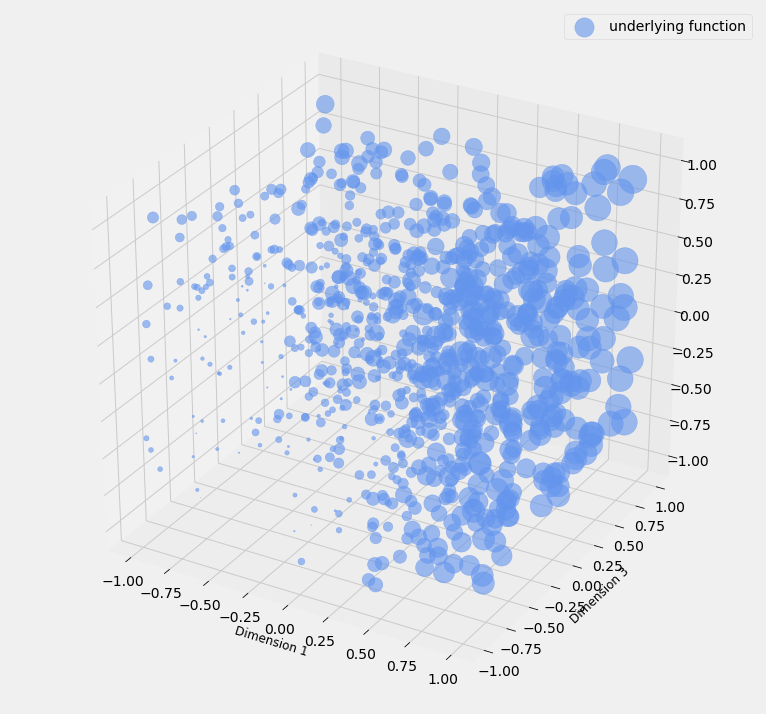

In [70]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

#Data

n = 1000
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 2, 1],]).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_4d(x, y_true)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_1 (Dense)             (None, 10)                40        
                                                                 
 linear (Dense)              (None, 1)                 11        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 3.1475
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.3454
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.3219
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1872
Epoch 5/

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


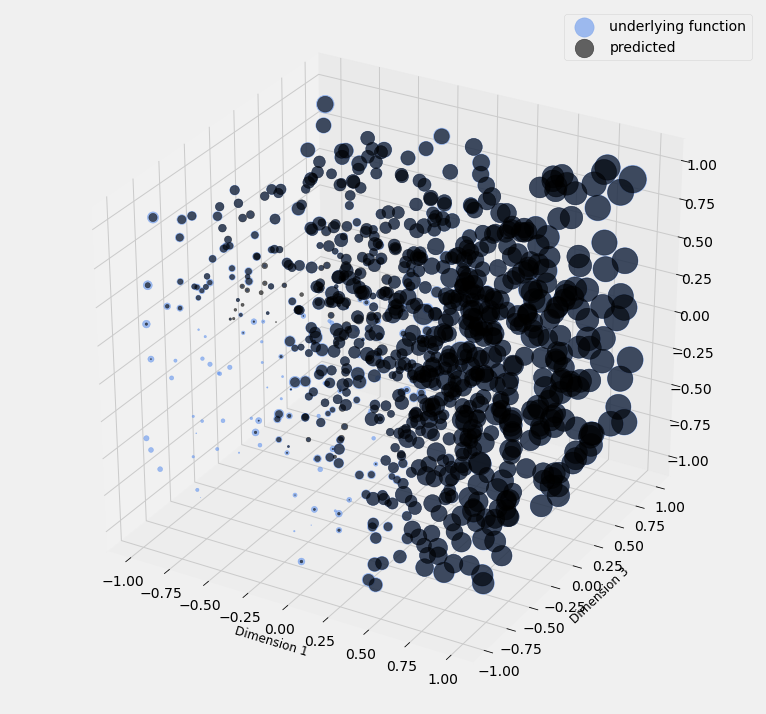

In [71]:
inputs = keras.Input(shape=(3,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='linear')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_4d(x, y_true, model(x))